In [1]:
import matplotlib.pyplot as plt

from ovals.geometry import Oval, Ellipse
from ovals.math_calculations import get_lines_intersection_point

In [64]:
def get_figure(plt, title, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=18)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    return plt

def put_points(pl, points, color='ro', markersize=1):
    x_points = [p.x for p in points]
    y_points = [p.y for p in points]
    pl.plot(x_points, y_points, color, markersize=markersize)
    return pl

### Отрисуем эллипс.

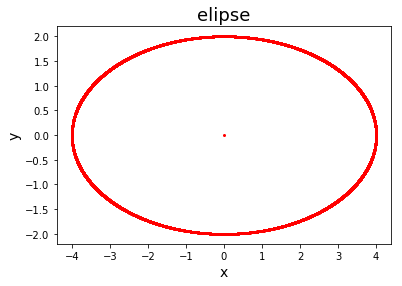

In [3]:
a = 4
b = 2
power = 2.3
ellipse = Ellipse(a, b)
draw_figure(ellipse.points, 'elipse')

### Преобразуем его к овалу и отрисуем касательные

y = -0.00584475597072 * x + 1.21812325227 y = 0.227968595744 * x + -26.6412811362


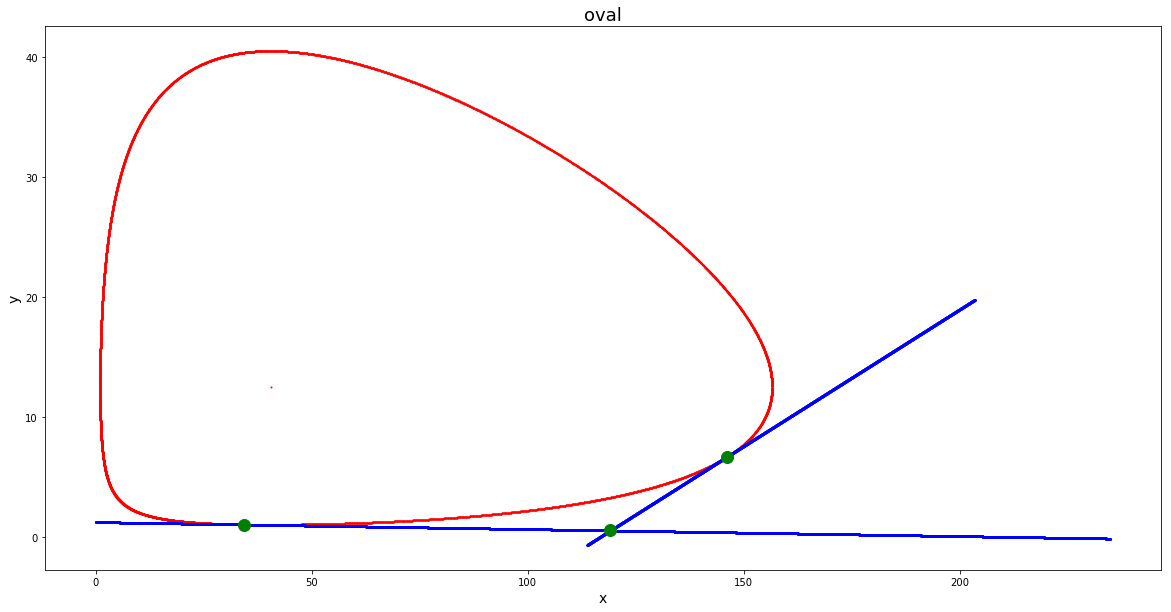

In [82]:
oval = Oval(a, b, power)
first_rand_point = oval.points[-1653]
second_rand_point = oval.points[-363]
first_tangent = oval.get_tangent_line(first_rand_point, left_power=1, right_power=.5, down_power=1.2, up_power=1)
second_tangent = oval.get_tangent_line(second_rand_point, left_power=1, right_power=.3, down_power=1.7, up_power=1)
print first_tangent, second_tangent
intersection_point = get_lines_intersection_point(first_tangent, second_tangent)
points = first_tangent.points + second_tangent.points + oval.points + [intersection_point]
p = get_figure(plt, 'oval')
# p.show()
p = put_points(p, oval.points)
p = put_points(p, first_tangent.points, 'bo')
p = put_points(p, second_tangent.points, 'bo')
p = put_points(p, [intersection_point, first_rand_point, second_rand_point], 'go', markersize=12)
p.show()

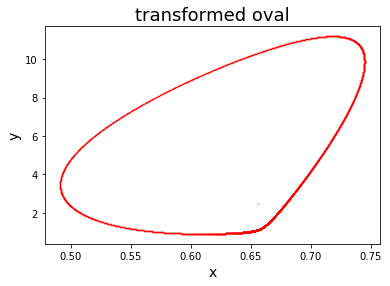

In [7]:
draw_figure(oval.projective_transform(0.1, 0.2, 0.1, -2, 0.3, 2, 0.3, 0.1), 'transformed oval')

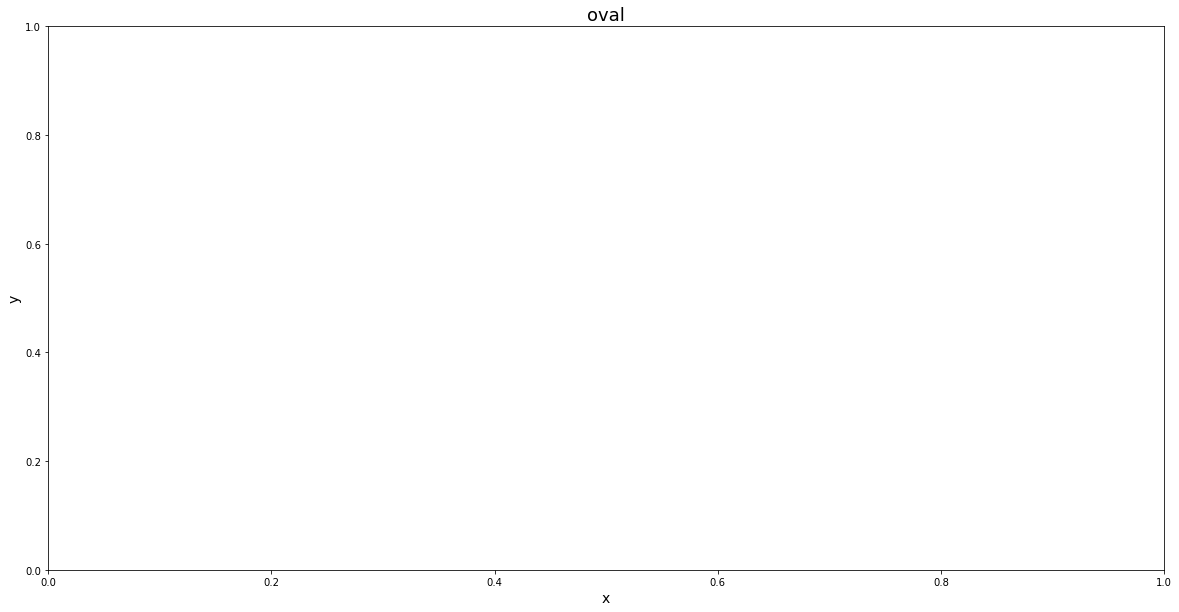

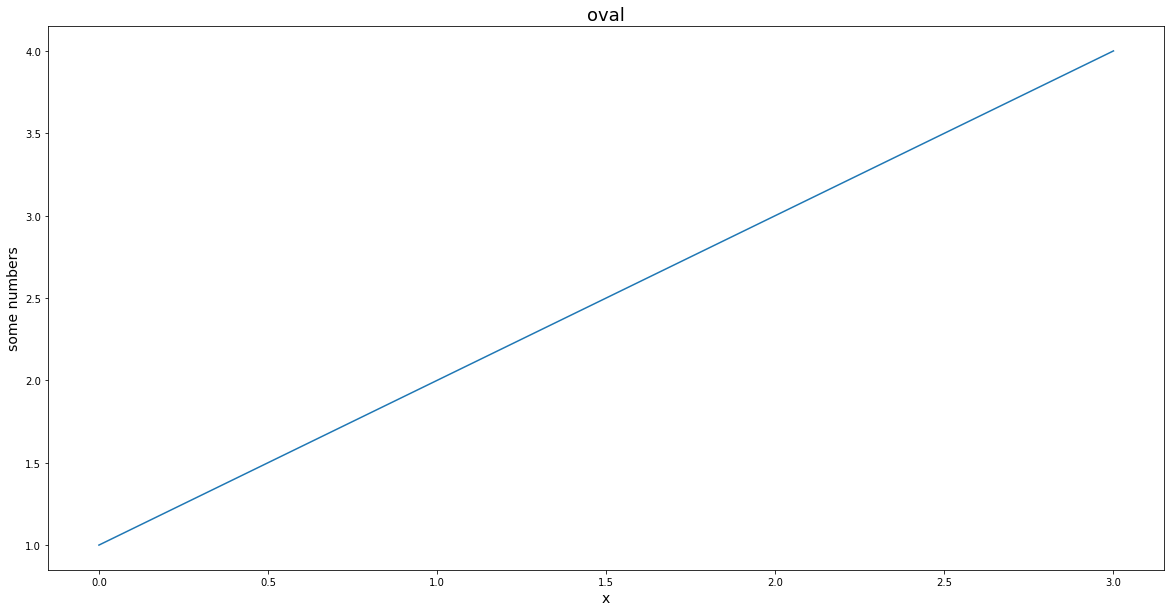

In [32]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()